In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = 'data/'
train_x = pd.read_csv(data_path + 'train.csv', header=None)
train_y = pd.read_csv(data_path + 'trainLabels.csv', header=None)
test = pd.read_csv(data_path + 'test.csv', header=None)

In [3]:
print(train_x.shape)
print(train_y.shape)

(1000, 40)
(1000, 1)


In [4]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float6

In [5]:
train_x.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


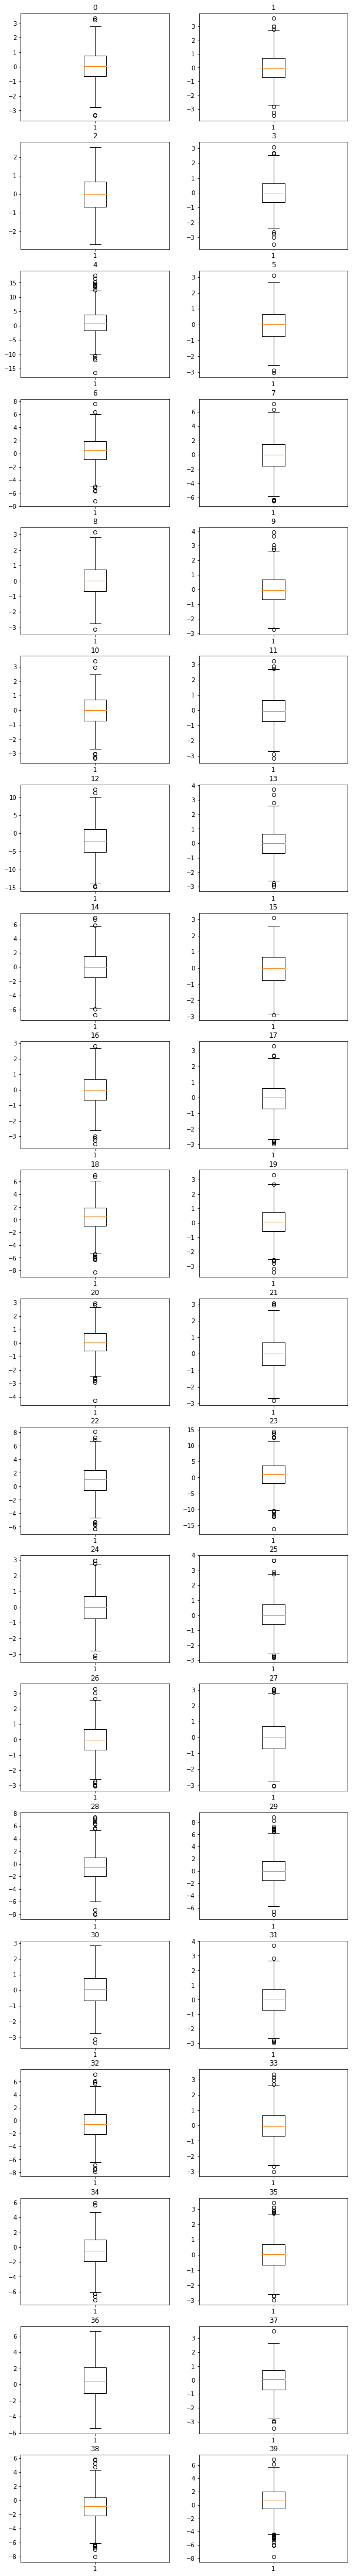

In [34]:
plt.figure(figsize=(10,80))
for col in list(train_x):
    plt.subplot(20, 2, col+1)
    plt.boxplot(train_x[col])
    plt.title(str(col))
plt.show()

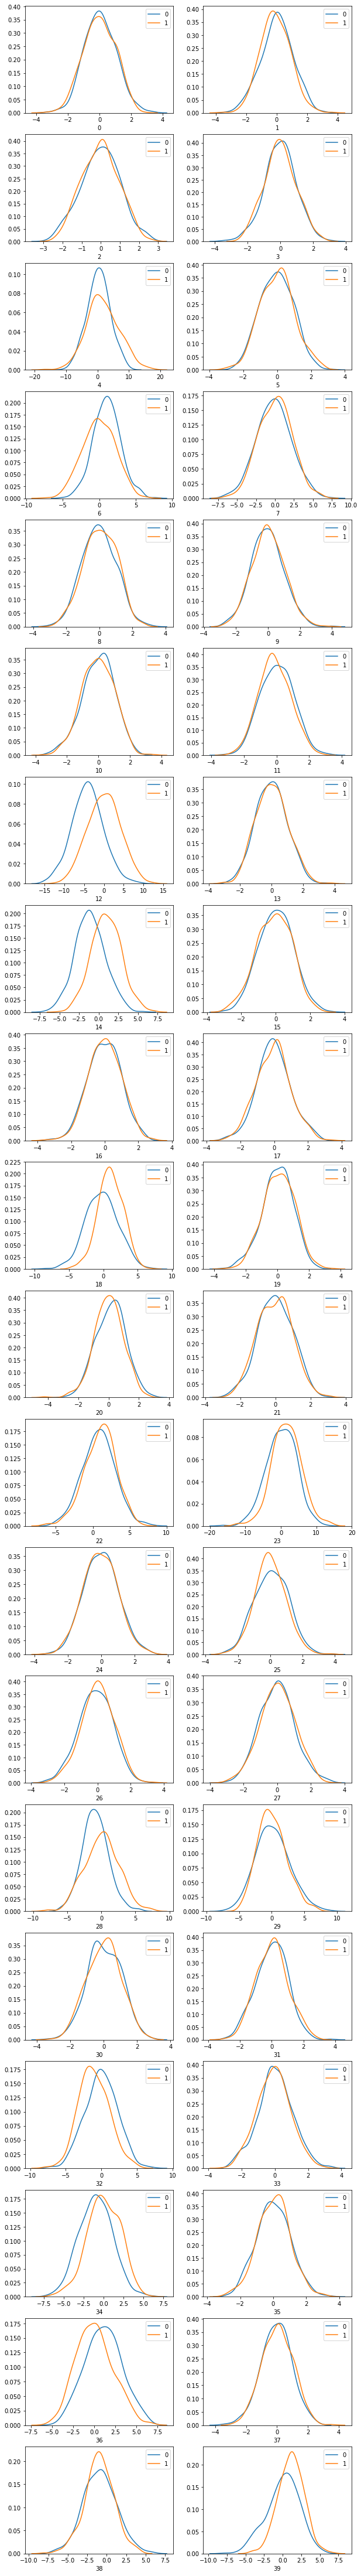

In [39]:
plt.figure(figsize=(10,80))
for col in list(train_x):
    plt.subplot(20, 2, col+1)
    sns.distplot(train_x.loc[train_y[0]==0, col], label="0", hist=False)
    sns.distplot(train_x.loc[train_y[0]==1, col], label="1", hist=False)
plt.show()

In [49]:
mms = MinMaxScaler()
x_mms = mms.fit_transform(train_x)
std = StandardScaler()
x_std = std.fit_transform(train_x)
norm = Normalizer()
x_norm = norm.fit_transform(train_x)

In [51]:
logreg = linear_model.LogisticRegression()
print(f'MinMaxScaler: {cross_val_score(logreg, x_mms, train_y[0], cv=5).mean()}')
print(f'StandardScaler: {cross_val_score(logreg, x_std, train_y[0], cv=5).mean()}')
print(f'Normalizer: {cross_val_score(logreg, x_norm, train_y[0], cv=5).mean()}')

MinMaxScaler: 0.818
StandardScaler: 0.82
Normalizer: 0.8240000000000001


C:\Users\Hui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hui\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

In [58]:
n = [40, 60, 80]
depth = [6, 8, 10, 12]
param = dict(n_estimators=n, max_depth=depth)
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param, scoring="accuracy", n_jobs=-1, verbose=1)
grid_result = grid_search.fit(train_x, train_y)

C:\Users\Hui\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
C:\Users\Hui\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [59]:
print(grid_result.best_score_)
print(grid_result.best_params_)

0.86
{'max_depth': 8, 'n_estimators': 80}


In [66]:
from sklearn.ensemble import GradientBoostingClassifier
n_estimators = [100, 200, 300]
max_depth = [3, 5, 7]
learning_rate = [0.1, 0.2, 0.3] 
param = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
clf = GradientBoostingClassifier(loss="exponential")
grid_search = GridSearchCV(clf, param, scoring="accuracy", n_jobs=-1, verbose=1)
grid_result = grid_search.fit(train_x, train_y)

C:\Users\Hui\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   12.1s finished
C:\Users\Hui\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
print(grid_result.best_score_)
print(grid_result.best_params_)

0.893
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


In [77]:
clf = GradientBoostingClassifier(loss="exponential", n_estimators=100, max_depth=5, learning_rate=0.2)
clf.fit(train_x, train_y)
y_pred = clf.predict(test)
submit = pd.DataFrame({'Id':np.arange(1,9001), 'Solution':y_pred})
submit.to_csv("Result.csv", index=False)

C:\Users\Hui\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
